    STUDENT NAME : Jashwanth Jegadeesan Vijayalakshmi                                                 STUDENT NUMBER : 19200055

# Task 1 : Importing all the needed packages

In [40]:
import urllib.request
import pandas as pd
import csv
import json
import os

# Task 2 : Identifying the API and parsing the data to a csv file
The API used here is UK carbon density API for a particular region. This depicts the percentage of various fuel sources that contributes to the carbon footprint and also this contains the forecast for the day. It is a live APi (which is nothing but the data is updated everyday and it can be viewed by changing the api parameter).
The following link is from where the API was obtained : https://api.carbonintensity.org.uk/. In this assignment, the data cleaning and analysis was done for London (Region ID : 13).

In [41]:
#providing the file with appropriate headers as given in the api documentation and creating a raw file
headers = ['regionid','dnoregion','shortname','from','to','forecast','index','fuel-biomass','fuel-coal',\
           'fuel-imports','fuel-gas','fuel-nuclear','fuel-other','fuel-hydro','fuel-solar','fuel-wind']  
with open("raw-data-fuel.csv","w",newline="") as write_file:
    f = csv.writer(write_file)
    f.writerow(headers)
write_file.close()


In [42]:
#accessing the api and extracting the json data in the given api
response = urllib.request.urlopen("https://api.carbonintensity.org.uk/regional/intensity/2020-02-01T12:00Z/2020-03-29T12:00Z/regionid/13")
raw_json = response.read().decode()
data_json = json.loads(raw_json)

In [43]:
#parsing the data
data_to_parse = data_json['data']['data']

In [44]:
#writing the parsed data to the created raw csv file
with open("raw-data-fuel.csv","a",newline="") as write_file:
    f = csv.writer(write_file) #creating list to append the parsed data to the appropriate headers
    for data in data_to_parse:
        list_to_write = []
        list_to_write.append(data_json['data']['regionid'])
        list_to_write.append(data_json['data']['dnoregion'])
        list_to_write.append(data_json['data']['shortname'])
        list_to_write.append(data['from'])
        list_to_write.append(data['to'])
        list_to_write.append(data['intensity']['forecast'])
        list_to_write.append(data['intensity']['index'])
        for genMix in data['generationmix']:
            #list_to_write.append(genMix['fuel'])
            list_to_write.append(genMix['perc'])
        f.writerow(list_to_write)
write_file.close()

# Task 3 : Converting the raw data to a dataframe using pandas
There is one CSV file which contains all the raw data. The data must be loaded to a dataframe and preprocessing steps must be performed to filter, combine and clean data for further visualisation and understanding of the data.

In [45]:
#converting the raw csv file to a dataframe using pandas so that further data manipulation and cleaning can be done
df = pd.read_csv("raw-data-fuel.csv")
df

,regionid,dnoregion,shortname,from,to,forecast,index,fuel-biomass,fuel-coal,fuel-imports,fuel-gas,fuel-nuclear,fuel-other,fuel-hydro,fuel-solar,fuel-wind
0,13,UKPN London,London,2020-02-01T11:30Z,2020-02-01T12:00Z,151,low,0.8,0.0,61.6,14.2,0.6,0,2.2,6.6,14.0
1,13,UKPN London,London,2020-02-01T12:00Z,2020-02-01T12:30Z,165,moderate,0.0,0.0,63.0,14.6,0.0,0,2.1,7.2,13.1
2,13,UKPN London,London,2020-02-01T12:30Z,2020-02-01T13:00Z,176,moderate,0.0,0.0,61.5,15.1,0.0,0,2.2,7.4,13.8
3,13,UKPN London,London,2020-02-01T13:00Z,2020-02-01T13:30Z,120,low,0.0,0.0,56.0,16.0,0.9,0,2.3,8.2,16.6
4,13,UKPN London,London,2020-02-01T13:30Z,2020-02-01T14:00Z,62,low,0.0,0.0,0.0,0.0,0.0,0,0.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,13,UKPN London,London,2020-03-29T09:30Z,2020-03-29T10:00Z,92,low,3.2,0.3,12.0,14.6,17.4,0,1.0,11.3,40.2
2733,13,UKPN London,London,2020-03-29T10:00Z,2020-03-29T10:30Z,92,low,3.2,0.2,13.2,14.9,16.6,0,1.1,11.7,39.1
2734,13,UKPN London,London,2020-03-29T10:30Z,2020-03-29T11:00Z,93,low,2.7,0.1,15.3,15.3,15.5,0,1.1,12.1,37.9
2735,13,UKPN London,London,2020-03-29T11:00Z,2020-03-29T11:30Z,94,low,2.4,0.1,15.4,15.7,14.9,0,1.0,13.2,37.3


# Task 4 : Preprocessing steps to filter, combine and clean data

In [46]:
#The two columns "from" and "to" are in string format. Hence they are converted to datetime format for easier and appropriate processing as they already represent the date and time
df['from'] = pd.to_datetime(df['from'])
df['to'] = pd.to_datetime(df['to'])

In [47]:
#The raw dataframe df is then moved to a more simplified dataframe. Note that the "fuel-other" do not contribute to the carbon intensity and hence it is ignored while moving to a simplified dataframe
simplified = df[["from","to","fuel-biomass","fuel-coal","fuel-imports","fuel-gas","fuel-nuclear","fuel-hydro","fuel-solar","fuel-wind"]]

In [48]:
simplified.rename(columns={"to":"date"},inplace=True) #Renaming the column "to" to "date" as we would require to have a single column for visualisation

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Checking for any missing values. If any missing values is found, it can be replaced with the average value or the most occurring value. All the columns are checked for any missing values. 

In [49]:
simplified.isnull().sum()

from            0
date            0
fuel-biomass    0
fuel-coal       0
fuel-imports    0
fuel-gas        0
fuel-nuclear    0
fuel-hydro      0
fuel-solar      0
fuel-wind       0
dtype: int64

There are no missing values found in the simplified dataframe. Hence we proceed further to check what are the datatypes present in the dataframe.

In [50]:
simplified.dtypes.value_counts()

float64                8
datetime64[ns, UTC]    2
dtype: int64

Since there are two columns for datetime ("from" and "date"[previously "to"]) we need to group the dataframe based on the "date" column to obtain the entire data of a single day as the data here is given for every 30 mins. 

In [51]:
viz_df = simplified.groupby([pd.Grouper(key='date',freq='D')]) #the frequency is Days

In [52]:
avg_data = viz_df.mean() #the new dataframe is viz_df. This dataframe is now transfered to a new dataframe avg_data after taking the mean of the viz_df 

In [53]:
avg_data

,fuel-biomass,fuel-coal,fuel-imports,fuel-gas,fuel-nuclear,fuel-hydro,fuel-solar,fuel-wind
date,,,,,,,,
2020-02-01 00:00:00+00:00,29.200000,0.000000,39.366667,14.008333,0.700000,1.075000,5.408333,10.241667
2020-02-02 00:00:00+00:00,16.779167,0.927083,41.212500,24.989583,2.570833,1.431250,0.670833,11.418750
2020-02-03 00:00:00+00:00,16.327083,0.791667,29.591667,18.804167,8.072917,1.618750,0.935417,23.858333
2020-02-04 00:00:00+00:00,7.685417,1.941667,28.841667,22.552083,7.902083,1.427083,0.977083,28.672917
2020-02-05 00:00:00+00:00,8.077083,4.777083,29.675000,47.518750,2.710417,1.027083,2.039583,4.175000
2020-02-06 00:00:00+00:00,4.637500,4.435417,35.741667,45.960417,2.950000,0.977083,3.008333,2.289583
2020-02-07 00:00:00+00:00,9.783333,3.806250,41.360417,32.616667,0.875000,1.087500,1.712500,8.758333
2020-02-08 00:00:00+00:00,10.664583,0.177083,34.360417,15.756250,8.675000,1.762500,1.508333,27.095833
2020-02-09 00:00:00+00:00,11.025000,0.456250,33.893750,19.866667,2.454167,1.706250,0.222917,30.375000


# Task 5 : Data Visualization and Analysis of cleaned datasheet

In [54]:
#the descriptive stats of the avg_data dataframe is displayed
print("\avg_data_data columnns:\n" + str(avg_data.columns) + "\n")
print("Avg_data Descriptive Stats:\n")
print(avg_data.describe())

vg_data_data columnns:
Index(['fuel-biomass', 'fuel-coal', 'fuel-imports', 'fuel-gas', 'fuel-nuclear',
       'fuel-hydro', 'fuel-solar', 'fuel-wind'],
      dtype='object')

Avg_data Descriptive Stats:

       fuel-biomass  fuel-coal  fuel-imports   fuel-gas  fuel-nuclear  \
count     58.000000  58.000000     58.000000  58.000000     58.000000   
mean       7.951241   1.228372     35.741092  27.639559      4.263526   
std        5.168824   1.391928      7.777858  10.328785      2.828377   
min        1.466667   0.000000      7.200000   5.884000      0.700000   
25%        4.136979   0.150521     30.842708  19.349479      2.036458   
50%        6.760417   0.785417     34.652083  24.865625      3.207292   
75%       10.602604   1.791146     40.017187  34.109375      5.900000   
max       29.200000   4.835417     53.879167  49.285417     12.372000   

       fuel-hydro  fuel-solar  fuel-wind  
count   58.000000   58.000000  58.000000  
mean     1.354981    2.279157  19.542072  
std     

In [55]:
#Libraries for the visualization are imported
#Matplotlib is used for this purpose
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Line Graph to analyse the percentage of contribution of each fuel

<Figure size 432x288 with 0 Axes>

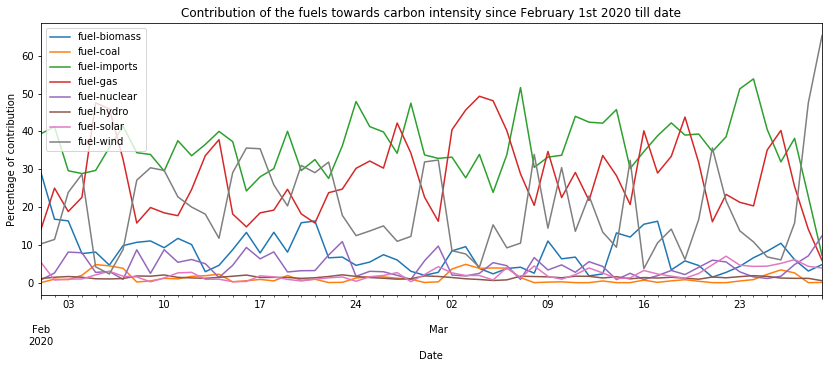

In [77]:
plt.figure()
avg_data.plot(figsize=(14,5))
plt.title("Contribution of the fuels towards carbon intensity since February 1st 2020 till date")
plt.ylabel("Percentage of contribution")
plt.xlabel("Date")
plt.show()

Since more clarity is needed, we seperate the graph by setting subplots attribute = true

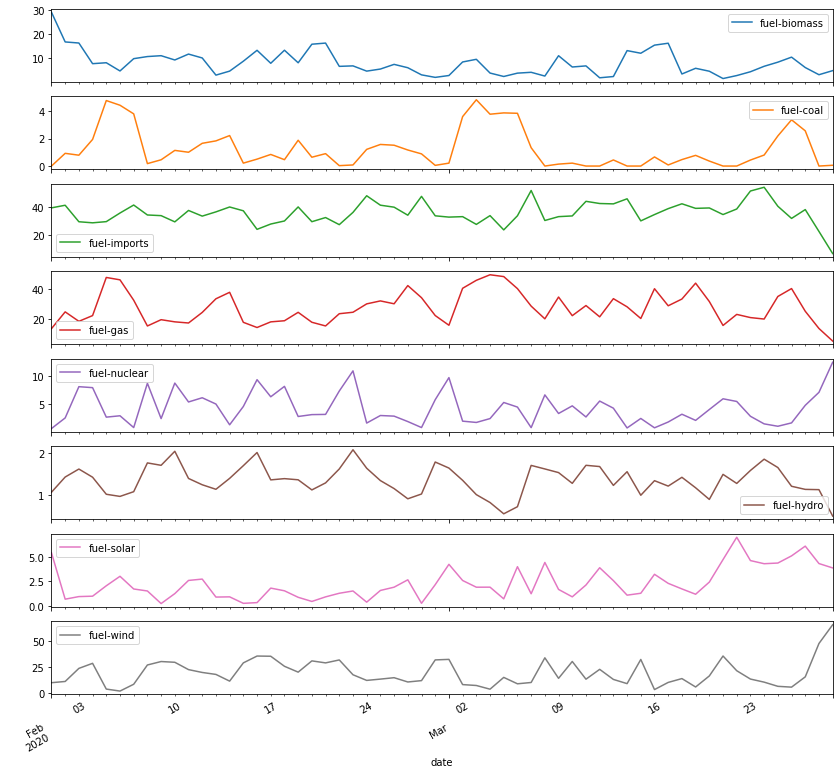

In [57]:
avg_data.plot(subplots=True, figsize=(14, 14));

Now, histogram is plotted to determine which fuel contributes to more carbon density

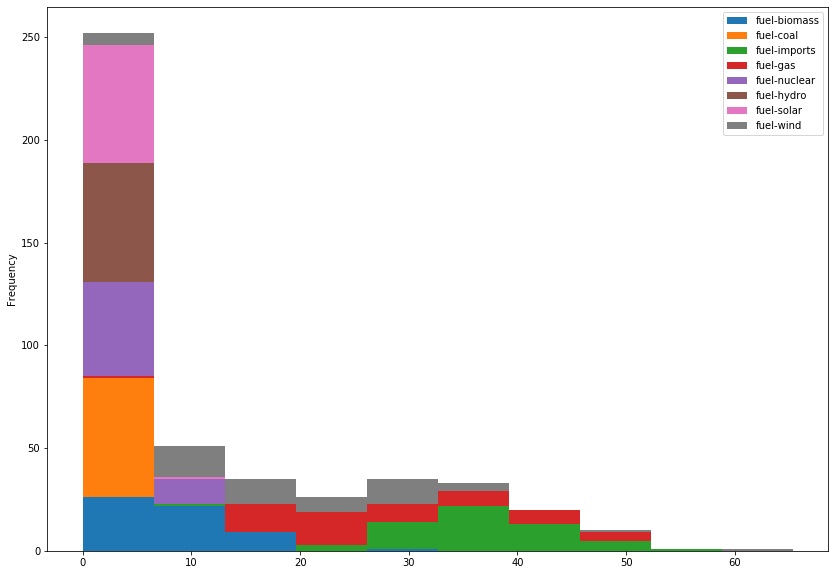

In [58]:
avg_data.plot.hist(stacked=True , figsize=(14,10))

From the above histogram we can see that imports fuel contribute to more carbon density which in turn increases the carbon intensity in London.

The dataframe comprises of data from the beginning of February 1st till March end. Hence, it is even more easier to analyse the data by months. 

In [59]:
avg_month = simplified.groupby([pd.Grouper(key='date',freq='M')]) #grouping the data based on the Month frequency

In [60]:
avg = avg_month.mean()

In [61]:
avg

,fuel-biomass,fuel-coal,fuel-imports,fuel-gas,fuel-nuclear,fuel-hydro,fuel-solar,fuel-wind
date,,,,,,,,
2020-02-29 00:00:00+00:00,9.232018,1.303874,35.141740,25.846564,4.734649,1.425585,1.399488,20.916082
2020-03-31 00:00:00+00:00,6.352301,1.194156,36.755953,30.035720,3.718992,1.303433,3.076698,17.562747


Bar graph showing the percentage of contribution by each fuel for the months of February and March

Text(0.5, 1.0, 'fuel')

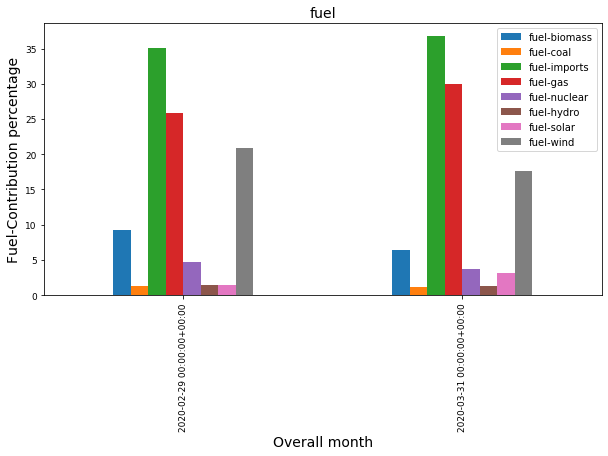

In [70]:
p = avg.plot.bar(figsize=(10,5),fontsize=9)
p.set_xlabel("Overall month",fontsize=14)
p.set_ylabel("Fuel-Contribution percentage",fontsize=14)
p.set_title("fuel",fontsize=14)

For more insight, the avg dataframe is now split into two (feb_data and march_data) using Slicing

In [63]:
feb_data = avg[0:1]
feb_data

,fuel-biomass,fuel-coal,fuel-imports,fuel-gas,fuel-nuclear,fuel-hydro,fuel-solar,fuel-wind
date,,,,,,,,
2020-02-29 00:00:00+00:00,9.232018,1.303874,35.14174,25.846564,4.734649,1.425585,1.399488,20.916082


In [64]:
march_data = avg[1:]
march_data

,fuel-biomass,fuel-coal,fuel-imports,fuel-gas,fuel-nuclear,fuel-hydro,fuel-solar,fuel-wind
date,,,,,,,,
2020-03-31 00:00:00+00:00,6.352301,1.194156,36.755953,30.03572,3.718992,1.303433,3.076698,17.562747


Horizontal bar graph is plotted for both the months individually.

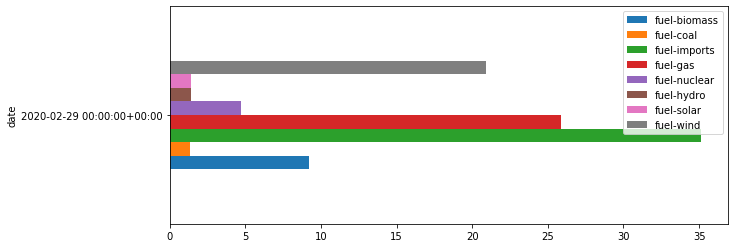

In [80]:
feb_data.plot.barh(figsize=(10,4))

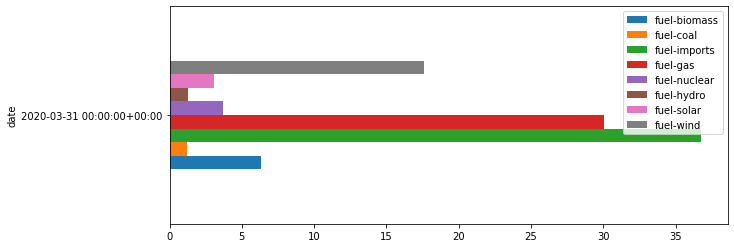

In [81]:
march_data.plot.barh(figsize=(10,4))

# Conclusion

It is clear that except for "fuel-other", rest of the fuels have considerable contribution to the carbon intensity.
But when it comes to individual contribution, it is evident that "fuel-imports" contribute the most to the carbon intensity, which is then followed by "fuel-gas" and "fuel-wind" respectively for both February and March months. It is also clear that the import fuel is the most used in London as it contributes the most to the carbon intensity.

Hence the usage of import fuels can be reduced to decrease the carbon intensity in London.